# Zindi Project - Financial Inclusion in Africa

Financial inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 14% of adults) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa, and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enable households to save and make payments while also helping businesses build up their credit-worthiness and improve their access to loans, insurance, and related services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

__The objective of this project is to create a machine learning model to predict which individuals are most likely to have or use a bank account.__ The models and solutions developed can provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda, while providing insights into some of the key factors driving individuals’ financial security.

# Our Goal

Our Goal is to predict values for our NaNs in our target column bank_account. 

## Data Overview

| column | additional information |
|--------|------------------------|
| country | Country interviewee is in |
| year | Year survey was done in  |
| uniqueid | Unique identifier for each interviewee | 
| location_type | Type of location: Rural, Urban |
| cellphone_access | If interviewee has access to a cellphone: Yes, No |
| household_size | Number of people living in one house |
| age_of_respondent | The age of the interviewee |
| gender_of_respondent | Gender of interviewee: Male, Female | 
| relationship_with_head | The interviewee’s relationship with the head of the house:Head of Household, Spouse, Child, Parent, Other relative, Other non-relatives, Dont know |
| marital_status | The martial status of the interviewee: Married/Living together, Divorced/Seperated, Widowed, Single/Never Married, Don’t know |
| education_level | Highest level of education: No formal education, Primary education, Secondary education, Vocational/Specialised training, Tertiary education, Other/Dont know/RTA |
| job_type | Type of job interviewee has: Farming and Fishing, Self employed, Formally employed Government, Formally employed Private, Informally employed, Remittance Dependent, Government Dependent, Other Income, No Income, Dont Know/Refuse to answer |

Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import chi2_contingency
from matplotlib.ticker import PercentFormatter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report




Importing the data

In [2]:
# Import the data into a dataframe
test = pd.read_csv('data/Test.csv')
train = pd.read_csv('data/train.csv')

# Make a new Dataframe with all the data
df = pd.concat([test, train])

Exporting Dataframe into a csv

In [3]:
# Export the dataframe into a csv:

# Define the path to the folder in your repository
folder_path = 'data/'

# Define the file name and extension
file_name = 'data.csv'

# Concatenate the folder path and file name
file_path = f'{folder_path}/{file_name}'

# Export the DataFrame to the specified folder
df.to_csv(file_path, index=False)


## EDA: Exploring the data

In this part of the notebook we look and analyze our financial inclusion data we got from Zindi.

In [4]:
# Print the shape of the data
print('Financial Inclusion dataset')
print('==================')
print('# observations: {}'.format(df.shape[0]))
print('# features:     {}'.format(df.shape[1]-1))

Financial Inclusion dataset
# observations: 33610
# features:     12


In [5]:
# Display first 5 rows
df.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,bank_account
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government,NaN
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private,NaN
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent,NaN
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent,NaN
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent,NaN


In [6]:
# Print a concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33610 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 33610 non-null  object
 1   year                    33610 non-null  int64 
 2   uniqueid                33610 non-null  object
 3   location_type           33610 non-null  object
 4   cellphone_access        33610 non-null  object
 5   household_size          33610 non-null  int64 
 6   age_of_respondent       33610 non-null  int64 
 7   gender_of_respondent    33610 non-null  object
 8   relationship_with_head  33610 non-null  object
 9   marital_status          33610 non-null  object
 10  education_level         33610 non-null  object
 11  job_type                33610 non-null  object
 12  bank_account            23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 3.6+ MB


In [7]:
# Generate descriptive statistics
df.describe()

,year,household_size,age_of_respondent
count,33610.000000,33610.000000,33610.000000
mean,2016.975930,3.791877,38.656114
std,0.847353,2.223138,16.447127
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [8]:
# The column labels of the DataFrame.
df.columns

Index(['country', 'year', 'uniqueid', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type', 'bank_account'],
      dtype='object')

In [9]:
# Check for missing values
df.isnull().sum()

country                       0
year                          0
uniqueid                      0
location_type                 0
cellphone_access              0
household_size                0
age_of_respondent             0
gender_of_respondent          0
relationship_with_head        0
marital_status                0
education_level               0
job_type                      0
bank_account              10086
dtype: int64

In [10]:
# check for unique values in column bank_account
df['bank_account'].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [11]:
# Checking for data imbalance
df['bank_account'].value_counts()

bank_account
No     20212
Yes     3312
Name: count, dtype: int64

We see that we have NaNs in the column bank account. Our goal is to fill this Nan values with values that our model (hopefully) predicts right.

What we need to do is:
* Create a data frame without NaNs. This will be the data we than will split into train and test data.
* Create a data frame with all the NaN values. This will be the data we than will have our model predict with.

In [12]:
# Create a new data frame without the NaN in our target feature
df_wo_target_nan = df.dropna()

# set new index for our dataframe without the NaNs
df_wo_target_nan = df_wo_target_nan.reset_index(drop=True)
df_wo_target_nan.isnull().value_counts()
df_wo_target_nan.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,bank_account
0,Kenya,2018,uniqueid_1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,Yes
1,Kenya,2018,uniqueid_2,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,No
2,Kenya,2018,uniqueid_3,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,Yes
3,Kenya,2018,uniqueid_4,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,No
4,Kenya,2018,uniqueid_5,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed,No


In [13]:
# create a new data frame with only the NaN in our target feature
df_with_target_nan = df.where(df['bank_account'].isnull())
df_with_target_nan.head()

# Set a new index for our dataframe with the NaNs
df_with_target_nan = df_with_target_nan.reset_index(drop=True)
df_with_target_nan.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,bank_account
0,Kenya,2018.0,uniqueid_6056,Urban,Yes,3.0,30.0,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government,NaN
1,Kenya,2018.0,uniqueid_6060,Urban,Yes,7.0,51.0,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private,NaN
2,Kenya,2018.0,uniqueid_6065,Rural,No,3.0,77.0,Female,Parent,Married/Living together,No formal education,Remittance Dependent,NaN
3,Kenya,2018.0,uniqueid_6072,Rural,No,6.0,39.0,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent,NaN
4,Kenya,2018.0,uniqueid_6073,Urban,No,3.0,16.0,Male,Child,Single/Never Married,Secondary education,Remittance Dependent,NaN


At this point we now focus on our dataframe without the NaNs. 
Quick look at the dataframe:

In [14]:
df_wo_target_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   location_type           23524 non-null  object
 4   cellphone_access        23524 non-null  object
 5   household_size          23524 non-null  int64 
 6   age_of_respondent       23524 non-null  int64 
 7   gender_of_respondent    23524 non-null  object
 8   relationship_with_head  23524 non-null  object
 9   marital_status          23524 non-null  object
 10  education_level         23524 non-null  object
 11  job_type                23524 non-null  object
 12  bank_account            23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [15]:
df_wo_target_nan.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [16]:
df_wo_target_nan.head().T

,0,1,2,3,4
country,Kenya,Kenya,Kenya,Kenya,Kenya
year,2018,2018,2018,2018,2018
uniqueid,uniqueid_1,uniqueid_2,uniqueid_3,uniqueid_4,uniqueid_5
location_type,Rural,Rural,Urban,Rural,Urban
cellphone_access,Yes,No,Yes,Yes,No
household_size,3,5,5,5,8
age_of_respondent,24,70,26,34,26
gender_of_respondent,Female,Female,Male,Female,Male
relationship_with_head,Spouse,Head of Household,Other relative,Head of Household,Child
marital_status,Married/Living together,Widowed,Single/Never Married,Married/Living together,Single/Never Married


In [17]:
# Show overview of all the unique values of the dataframe:
for column in df_wo_target_nan.columns:
    unique_values = df_wo_target_nan[column].unique()
    print(f"Column '{column}' has {len(unique_values)} unique value(s):")
    print(unique_values)
    print()

Column 'country' has 4 unique value(s):
['Kenya' 'Rwanda' 'Tanzania' 'Uganda']

Column 'year' has 3 unique value(s):
[2018 2016 2017]

Column 'uniqueid' has 8735 unique value(s):
['uniqueid_1' 'uniqueid_2' 'uniqueid_3' ... 'uniqueid_8757'
 'uniqueid_8758' 'uniqueid_8759']

Column 'location_type' has 2 unique value(s):
['Rural' 'Urban']

Column 'cellphone_access' has 2 unique value(s):
['Yes' 'No']

Column 'household_size' has 20 unique value(s):
[ 3  5  8  7  1  6  4 10  2 11  9 12 16 15 13 14 21 18 17 20]

Column 'age_of_respondent' has 85 unique value(s):
[ 24  70  26  34  32  42  54  76  40  69  64  31  38  47  27  48  25  21
  18  22  58  55  62  29  35  45  67  19  80  66  50  33  28  51  16  17
  30  37  59  65  46  56  52  23  43  49  44  72  53  63  39  81  78  36
  20  60  95  71  57  85  68  41  61  75  86  73  93  74  88  90  77  84
  82  89  79  83  94  87  92  91  98  97  96  99 100]

Column 'gender_of_respondent' has 2 unique value(s):
['Female' 'Male']

Column 'relations

In [18]:
# Checking for duplicate values
print(f"duplicate values in columns")

display(df_wo_target_nan.duplicated().value_counts())

print('No duplicates found.')
print("______"*30)

duplicate values in columns


False    23524
Name: count, dtype: int64

No duplicates found.
____________________________________________________________________________________________________________________________________________________________________________________


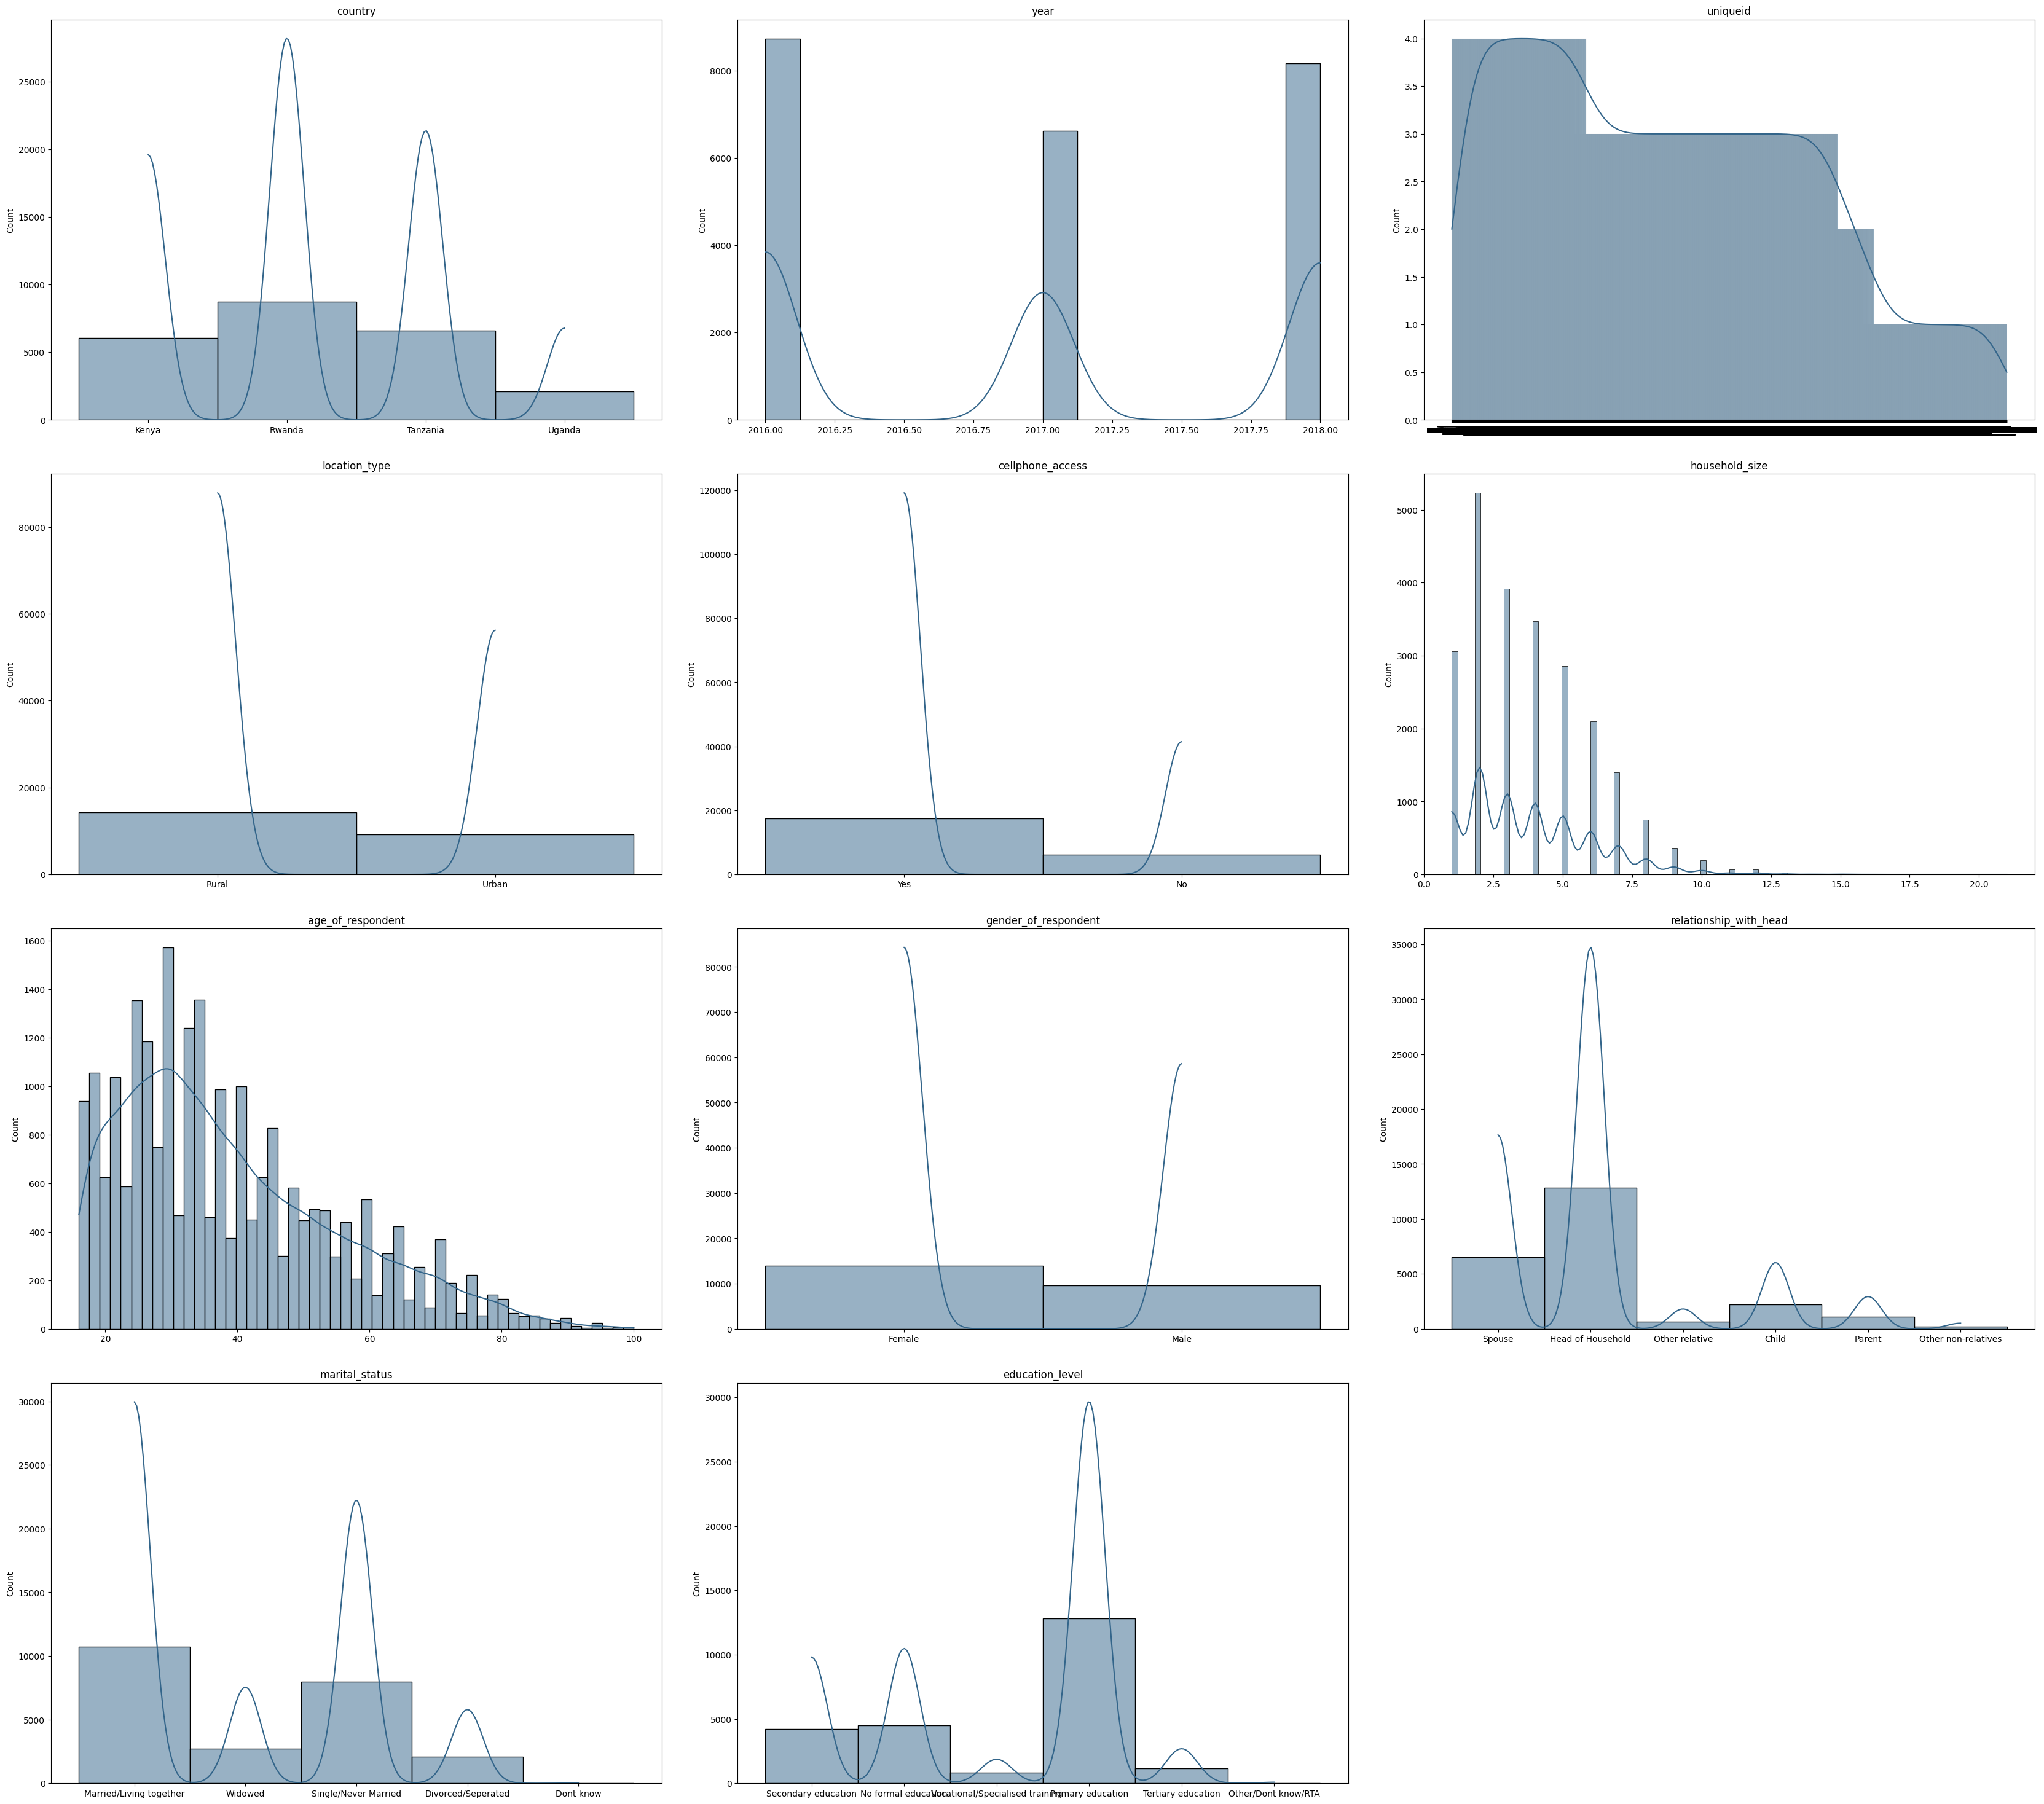

In [19]:
# Plot distribution of features 

features = df_wo_target_nan.columns.tolist()
features.remove('bank_account')

fig,ax = plt.subplots(4,3,figsize=(34,30))
count = 0
for item in features:
    sns.histplot(df_wo_target_nan[item], kde=True, ax=ax[int(count/3)][count%3], color='#33658A').set(title=item, xlabel='')
    count += 1
ax.flat[-1].set_visible(False)
fig.tight_layout(pad=3)


In [20]:
# Plotting correlation between numeric columns
numeric_df = df_wo_target_nan.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

fig = go.Figure(data=go.Heatmap(z=correlation_matrix.values, x=correlation_matrix.columns, y=correlation_matrix.index))

fig.show()

In [21]:
'''# Initialize an empty matrix to store Cramér's V values
n_columns = len(df_wo_target_nan.columns)
cramers_matrix = np.zeros((n_columns, n_columns))

# Iterate over each pair of columns
for i in range(n_columns):
    for j in range(n_columns):
        # Create a contingency table for the column pair
        contingency_table = pd.crosstab(df_wo_target_nan.iloc[:, i], df.iloc[:, j])
        
        # Perform the chi-square test and calculate Cramér's V
        chi2, _, _, _ = chi2_contingency(contingency_table)
        n = len(df_wo_target_nan)
        cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
        
        # Store the Cramér's V value in the matrix
        cramers_matrix[i, j] = cramers_v

# Create a DataFrame from the matrix with column names as indices and columns
cramers_df = pd.DataFrame(cramers_matrix, index=df_wo_target_nan.columns, columns=df_wo_target_nan.columns)

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_df, annot=True, fmt=".2f", cmap="crest", square=True)
plt.title("Cramér's V Heatmap")
plt.show()'''

'# Initialize an empty matrix to store Cramér\'s V values\nn_columns = len(df_wo_target_nan.columns)\ncramers_matrix = np.zeros((n_columns, n_columns))\n\n# Iterate over each pair of columns\nfor i in range(n_columns):\n    for j in range(n_columns):\n        # Create a contingency table for the column pair\n        contingency_table = pd.crosstab(df_wo_target_nan.iloc[:, i], df.iloc[:, j])\n        \n        # Perform the chi-square test and calculate Cramér\'s V\n        chi2, _, _, _ = chi2_contingency(contingency_table)\n        n = len(df_wo_target_nan)\n        cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))\n        \n        # Store the Cramér\'s V value in the matrix\n        cramers_matrix[i, j] = cramers_v\n\n# Create a DataFrame from the matrix with column names as indices and columns\ncramers_df = pd.DataFrame(cramers_matrix, index=df_wo_target_nan.columns, columns=df_wo_target_nan.columns)\n\n# Create a heatmap using Seaborn\nplt.figure(figsize=(10, 8

Find out if there is a relation between the features (which contains objects) and our target feature, using the "Cramers V".

* Small Effect:
Cramér's V values close to 0 indicate a weak or negligible association between the categorical variables.

* Medium Effect:
Cramér's V values around 0.1 to 0.3 suggest a moderate association. This indicates that the variables have some degree of dependency, but the association may not be very strong.

* Large Effect:
Cramér's V values close to 0.3 or higher indicate a relatively strong association between the categorical variables. This suggests a notable dependency or relationship between the variables.


In [22]:
# Check each column vs. the target column if there is a correlation by creating a function using the Cramér's V:

# make a list with each column name 
column_names = df_wo_target_nan.columns.tolist()
# delete bank_account from the list
column_names.remove('bank_account')
# create target value
target_column = 'bank_account'

def cramers_v(list, target_column):
    
    for name in list:
        # Create a contingency table
        contingency_table = pd.crosstab(df_wo_target_nan[name], df_wo_target_nan[target_column])

        # Perform chi-square test
        chi2, p, *_ = chi2_contingency(contingency_table)

        # Calculate Cramér's V
        n = len(df_wo_target_nan)
        cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

        # only print output is cramers_v is bigger than 0.1
        if cramers_v >= 0.1:

            print('-----------------------------')
            print(f'{name} vs. {target_column}')
            # print("Chi-square:", chi2)
            # print("p-value:", p)
            print("Cramér's V:", round(cramers_v, 3))
        

cramers_v(column_names, target_column)
cramers_v(['job_type'], 'education_level')

-----------------------------
country vs. bank_account
Cramér's V: 0.189
-----------------------------
year vs. bank_account
Cramér's V: 0.144
-----------------------------
uniqueid vs. bank_account
Cramér's V: 0.595
-----------------------------
cellphone_access vs. bank_account
Cramér's V: 0.21
-----------------------------
age_of_respondent vs. bank_account
Cramér's V: 0.14
-----------------------------
gender_of_respondent vs. bank_account
Cramér's V: 0.117
-----------------------------
relationship_with_head vs. bank_account
Cramér's V: 0.118
-----------------------------
education_level vs. bank_account
Cramér's V: 0.388
-----------------------------
job_type vs. bank_account
Cramér's V: 0.359
-----------------------------
job_type vs. education_level
Cramér's V: 0.192


Because there is a medium correlation between job type and education level and a high correlation between job type/bank account and education level/bank account: let's make a plot to show it.


In [23]:
# your code here!

## Cleaning the data

We now drop columns if they:

* are an ID
* have no to negligible correlation to the target feature


In [24]:
df_wo_target_nan.columns

Index(['country', 'year', 'uniqueid', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type', 'bank_account'],
      dtype='object')

Renaming the columns for better readability:

In [25]:
# Renaming the column names
df_wo_target_nan.rename(columns = {'country': 'country',
        'year': 'year',
        'uniqueid': 'id',
        'location_type': 'location',
        'cellphone_access': 'cellphone',
        'household_size': 'household_size',
        'age_of_respondent': 'age',
        'gender_of_respondent': 'gender',
        'relationship_with_head': 'relationship_with_head', 
        'marital_status': 'marital_status', 
        'education_level': 'education',
        'job_type': 'job',
        'bank_account': 'bank_account'},
        inplace = True)

df_wo_target_nan.head().T

,0,1,2,3,4
country,Kenya,Kenya,Kenya,Kenya,Kenya
year,2018,2018,2018,2018,2018
id,uniqueid_1,uniqueid_2,uniqueid_3,uniqueid_4,uniqueid_5
location,Rural,Rural,Urban,Rural,Urban
cellphone,Yes,No,Yes,Yes,No
household_size,3,5,5,5,8
age,24,70,26,34,26
gender,Female,Female,Male,Female,Male
relationship_with_head,Spouse,Head of Household,Other relative,Head of Household,Child
marital_status,Married/Living together,Widowed,Single/Never Married,Married/Living together,Single/Never Married


In [26]:
# drop id column
df_wo_target_nan = df_wo_target_nan.drop('id', axis=1)
df_wo_target_nan.head().T

,0,1,2,3,4
country,Kenya,Kenya,Kenya,Kenya,Kenya
year,2018,2018,2018,2018,2018
location,Rural,Rural,Urban,Rural,Urban
cellphone,Yes,No,Yes,Yes,No
household_size,3,5,5,5,8
age,24,70,26,34,26
gender,Female,Female,Male,Female,Male
relationship_with_head,Spouse,Head of Household,Other relative,Head of Household,Child
marital_status,Married/Living together,Widowed,Single/Never Married,Married/Living together,Single/Never Married
education,Secondary education,No formal education,Vocational/Specialised training,Primary education,Primary education


In [27]:
df_wo_target_nan.nunique()

country                    4
year                       3
location                   2
cellphone                  2
household_size            20
age                       85
gender                     2
relationship_with_head     6
marital_status             5
education                  6
job                       10
bank_account               2
dtype: int64

''

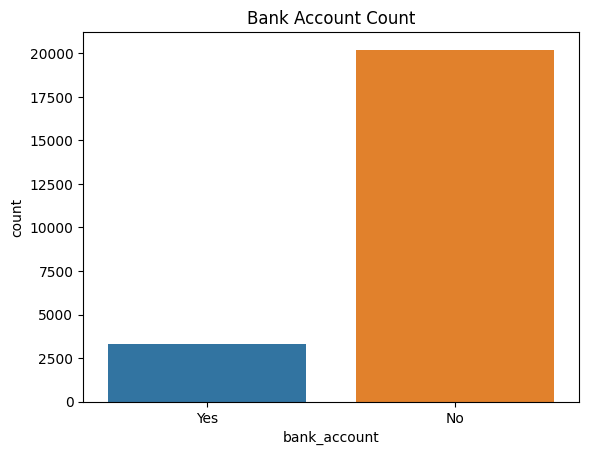

In [28]:
# Plotting the target variable
plt.title('Bank Account Count')
sns.countplot(x=df_wo_target_nan.bank_account)
;

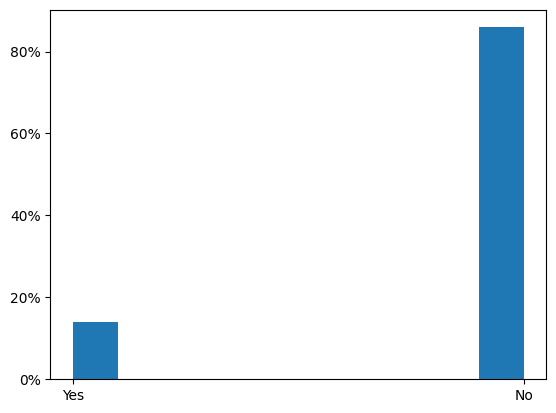

In [29]:
# plot which shows percentage of people with and without a bank account
data = df_wo_target_nan['bank_account']

plt.hist(data, weights=np.ones(len(data)) / len(data))

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

In [30]:
df_wo_target_nan['bank_account'].value_counts()

bank_account
No     20212
Yes     3312
Name: count, dtype: int64

In the two histogramm plots we can see that the data isn't well balanced. Out of 23.524 people in our dataset only 3.312 people (~18%) have a bank account. 20.212 don't.

&rarr; We need to remove our majority class!
<br>

In this plot we can see that we have outliers in the household_size column and also in the age column.

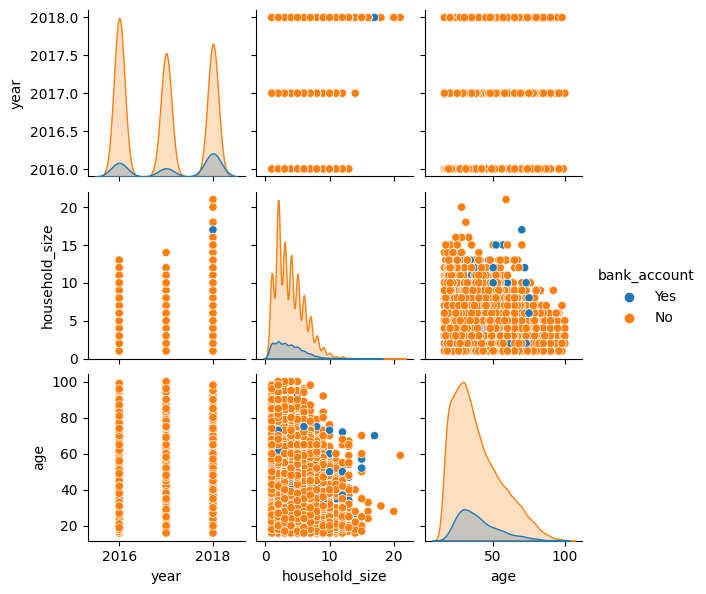

In [31]:
# Plotting a pairplot to see how the variables differ depending on our target variable - 'bank_account'
sns.pairplot(df_wo_target_nan, hue='bank_account', height=2);

Because we have many categorical values we have to use hot-one encoding. 
We are now creating our dummy variables.

In [32]:
# Function to make dummy variables for our categorical columns

cat_feats = ['country', 'year', 'location', 'cellphone', 'gender', 'relationship_with_head', 'marital_status', 'education', 'job', 'bank_account']
df_dummy = pd.get_dummies(df_wo_target_nan, columns=cat_feats, drop_first=True)

df_dummy.columns

Index(['household_size', 'age', 'country_Rwanda', 'country_Tanzania',
       'country_Uganda', 'year_2017', 'year_2018', 'location_Urban',
       'cellphone_Yes', 'gender_Male',
       'relationship_with_head_Head of Household',
       'relationship_with_head_Other non-relatives',
       'relationship_with_head_Other relative',
       'relationship_with_head_Parent', 'relationship_with_head_Spouse',
       'marital_status_Dont know', 'marital_status_Married/Living together',
       'marital_status_Single/Never Married', 'marital_status_Widowed',
       'education_Other/Dont know/RTA', 'education_Primary education',
       'education_Secondary education', 'education_Tertiary education',
       'education_Vocational/Specialised training', 'job_Farming and Fishing',
       'job_Formally employed Government', 'job_Formally employed Private',
       'job_Government Dependent', 'job_Informally employed', 'job_No Income',
       'job_Other Income', 'job_Remittance Dependent', 'job_Self employ

In [33]:
df_dummy.head(10).T
# bin age and household size

,0,1,2,3,4,5,6,7,8,9
household_size,3,5,5,5,8,7,7,1,3,3
age,24,70,26,34,26,26,32,42,54,76
country_Rwanda,False,False,False,False,False,False,False,False,False,False
country_Tanzania,False,False,False,False,False,False,False,False,False,False
country_Uganda,False,False,False,False,False,False,False,False,False,False
year_2017,False,False,False,False,False,False,False,False,False,False
year_2018,True,True,True,True,True,True,True,True,True,True
location_Urban,False,False,True,False,True,False,False,False,False,True
cellphone_Yes,True,False,True,True,False,False,True,True,True,True
gender_Male,False,False,True,False,True,False,False,False,True,False


In [34]:
df_scaled = df_dummy.copy()

In [35]:
# Scaling the Columns with numerical data (household_size, age) using Standard Scaler
columns_to_scale = ['household_size', 'age']

scaler = StandardScaler()
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])



In [36]:
df_dummy.describe()

,household_size,age
count,23524.000000,23524.000000
mean,3.797483,38.805220
std,2.227613,16.520569
min,1.000000,16.000000
25%,2.000000,26.000000
50%,3.000000,35.000000
75%,5.000000,49.000000
max,21.000000,100.000000


In [37]:
df_scaled.describe()

,household_size,age
count,2.352400e+04,2.352400e+04
mean,-5.799363e-17,1.111544e-16
std,1.000021e+00,1.000021e+00
min,-1.255848e+00,-1.380443e+00
25%,-8.069273e-01,-7.751242e-01
50%,-3.580067e-01,-2.303372e-01
75%,5.398345e-01,6.171093e-01
max,7.722564e+00,3.704236e+00


In [38]:
df_bined = df_dummy.copy()

In [39]:
# Creating bins for the Column Age

# Define the bin edges for the age classes
bin_edges = [0, 20, 40, 70, 100]

# Define the labels for the age classes
class_labels = ['0-20', '20-40', '40-70', '70-100']

# Create new column with age classes
df_bined['age_class'] = pd.cut(df_bined['age'], bins=bin_edges, labels=class_labels, right=False, ordered=False)

# Convert age_class column into binary columns
df_bined = pd.get_dummies(df_bined, columns=['age_class'], prefix='age', drop_first=False)

# Remove the original 'age' column
df_bined.drop('age', axis=1, inplace=True)


In [40]:
df_bined.head(10)

,household_size,country_Rwanda,country_Tanzania,country_Uganda,year_2017,year_2018,location_Urban,cellphone_Yes,gender_Male,relationship_with_head_Head of Household,...,job_Informally employed,job_No Income,job_Other Income,job_Remittance Dependent,job_Self employed,bank_account_Yes,age_0-20,age_20-40,age_40-70,age_70-100
0,3,False,False,False,False,True,False,True,False,False,...,False,False,False,False,True,True,False,True,False,False
1,5,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
2,5,False,False,False,False,True,True,True,True,False,...,False,False,False,False,True,True,False,True,False,False
3,5,False,False,False,False,True,False,True,False,True,...,False,False,False,False,False,False,False,True,False,False
4,8,False,False,False,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
5,7,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
6,7,False,False,False,False,True,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False
7,1,False,False,False,False,True,False,True,False,True,...,False,False,False,False,False,False,False,False,True,False
8,3,False,False,False,False,True,False,True,True,True,...,False,False,False,False,False,True,False,False,True,False
9,3,False,False,False,False,True,True,True,False,True,...,False,False,False,True,False,False,False,False,False,True


In [41]:
# moving the new columns to the beginning of the dataset

# Define the column order with the new columns at the start
column_order = ['age_0-20', 'age_20-40', 'age_40-70', 'age_70-100'] + list(df_bined.columns[:-4])

# Reorder the columns in the DataFrame
df_bined = df_bined[column_order]


In [42]:
df_bined.head(10)

,age_0-20,age_20-40,age_40-70,age_70-100,household_size,country_Rwanda,country_Tanzania,country_Uganda,year_2017,year_2018,...,job_Farming and Fishing,job_Formally employed Government,job_Formally employed Private,job_Government Dependent,job_Informally employed,job_No Income,job_Other Income,job_Remittance Dependent,job_Self employed,bank_account_Yes
0,False,True,False,False,3,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,True
1,False,False,False,True,5,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
2,False,True,False,False,5,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,True
3,False,True,False,False,5,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
4,False,True,False,False,8,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
5,False,True,False,False,7,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
6,False,True,False,False,7,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
7,False,False,True,False,1,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
8,False,False,True,False,3,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,True
9,False,False,False,True,3,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [43]:
# Creating bins for the Column household_size

bin_edges = [1, 2, 5, 10, 25]
class_labels = ['1-2', '2-5', '5-10', '10-25']
df_bined['household_size_class'] = pd.cut(df_bined['household_size'], bins=bin_edges, labels=class_labels, right=False, ordered=False)
df_bined = pd.get_dummies(df_bined, columns=['household_size_class'], prefix='household_size', drop_first=False)
df_bined.drop('household_size', axis=1, inplace=True)

In [44]:
df_bined.head(10)

,age_0-20,age_20-40,age_40-70,age_70-100,country_Rwanda,country_Tanzania,country_Uganda,year_2017,year_2018,location_Urban,...,job_Informally employed,job_No Income,job_Other Income,job_Remittance Dependent,job_Self employed,bank_account_Yes,household_size_1-2,household_size_2-5,household_size_5-10,household_size_10-25
0,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,True,True,False,True,False,False
1,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,False,True,False,False,False,False,False,False,True,True,...,False,False,False,False,True,True,False,False,True,False
3,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4,False,True,False,False,False,False,False,False,True,True,...,True,False,False,False,False,False,False,False,True,False
5,False,True,False,False,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
6,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
7,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
8,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
9,False,False,False,True,False,False,False,False,True,True,...,False,False,False,True,False,False,False,True,False,False


In [45]:
# reorder the columns for household_size (from end to beginning)
column_order = ['household_size_1-2', 'household_size_2-5', 'household_size_5-10', 'household_size_10-25'] + list(df_bined.columns[:-4])
df_bined = df_bined[column_order]

In [46]:
df_bined.head(10)

,household_size_1-2,household_size_2-5,household_size_5-10,household_size_10-25,age_0-20,age_20-40,age_40-70,age_70-100,country_Rwanda,country_Tanzania,...,job_Farming and Fishing,job_Formally employed Government,job_Formally employed Private,job_Government Dependent,job_Informally employed,job_No Income,job_Other Income,job_Remittance Dependent,job_Self employed,bank_account_Yes
0,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
1,False,False,True,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
2,False,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
3,False,False,True,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,True,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
5,False,False,True,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
6,False,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7,True,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
8,False,True,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
9,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [47]:
df_bined.dtypes

household_size_1-2                            bool
household_size_2-5                            bool
household_size_5-10                           bool
household_size_10-25                          bool
age_0-20                                      bool
age_20-40                                     bool
age_40-70                                     bool
age_70-100                                    bool
country_Rwanda                                bool
country_Tanzania                              bool
country_Uganda                                bool
year_2017                                     bool
year_2018                                     bool
location_Urban                                bool
cellphone_Yes                                 bool
gender_Male                                   bool
relationship_with_head_Head of Household      bool
relationship_with_head_Other non-relatives    bool
relationship_with_head_Other relative         bool
relationship_with_head_Parent  

In [48]:
# Convert boolean values to 0s and 1s
df_bined = df_bined.astype(int)

In [49]:
df_bined.head(10)

,household_size_1-2,household_size_2-5,household_size_5-10,household_size_10-25,age_0-20,age_20-40,age_40-70,age_70-100,country_Rwanda,country_Tanzania,...,job_Farming and Fishing,job_Formally employed Government,job_Formally employed Private,job_Government Dependent,job_Informally employed,job_No Income,job_Other Income,job_Remittance Dependent,job_Self employed,bank_account_Yes
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
9,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [50]:
# Split the dataset into features (X) and target (y)
X = df_bined.drop('bank_account_Yes', axis=1)
y = df_bined['bank_account_Yes']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier
knn = KNeighborsClassifier()

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict using the trained model
y_pred = knn.predict(X_test)

# Evaluate the model's performance (e.g., accuracy)
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.8697130712008502


In [51]:
# Split the dataset into features (X) and target (y)
X = df_bined.drop('bank_account_Yes', axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier
knn = KNeighborsClassifier()

# Define the hyperparameters to search over
param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15],  # Example values for the number of neighbors
    'weights': ['uniform', 'distance'],  # Example values for the weight function
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5)  # Adjust the number of cross-validation folds as needed
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model's performance (e.g., accuracy)
accuracy = best_model.score(X_test, y_test)
print("Best Accuracy:", accuracy)
print("Best Hyperparameters:", best_params)

Best Accuracy: 0.8860786397449522
Best Hyperparameters: {'n_neighbors': 15, 'weights': 'uniform'}


In [52]:
# Apply with the best K and Method
X = df_bined.drop('bank_account_Yes', axis=1)
y = df_bined['bank_account_Yes']

# Create a KNN classifier with K=15 and weights set to 'uniform'
knn = KNeighborsClassifier(n_neighbors=15, weights='uniform')

# Fit the classifier to the data
knn.fit(X, y)

# Make predictions
y_pred = knn.predict(X)

# Generate the classification report
report = classification_report(y, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     20212
           1       0.73      0.33      0.46      3312

    accuracy                           0.89     23524
   macro avg       0.82      0.66      0.70     23524
weighted avg       0.88      0.89      0.87     23524



### Visualize the K-NN Model with "parallel_coordinates", which is a method used for multidimensional data.
The y-axis represents the scaled values of the features, the x-axis the features.

In [53]:
# Print all column names
column_names = df_bined.columns.tolist()
print(column_names)

['household_size_1-2', 'household_size_2-5', 'household_size_5-10', 'household_size_10-25', 'age_0-20', 'age_20-40', 'age_40-70', 'age_70-100', 'country_Rwanda', 'country_Tanzania', 'country_Uganda', 'year_2017', 'year_2018', 'location_Urban', 'cellphone_Yes', 'gender_Male', 'relationship_with_head_Head of Household', 'relationship_with_head_Other non-relatives', 'relationship_with_head_Other relative', 'relationship_with_head_Parent', 'relationship_with_head_Spouse', 'marital_status_Dont know', 'marital_status_Married/Living together', 'marital_status_Single/Never Married', 'marital_status_Widowed', 'education_Other/Dont know/RTA', 'education_Primary education', 'education_Secondary education', 'education_Tertiary education', 'education_Vocational/Specialised training', 'job_Farming and Fishing', 'job_Formally employed Government', 'job_Formally employed Private', 'job_Government Dependent', 'job_Informally employed', 'job_No Income', 'job_Other Income', 'job_Remittance Dependent', 'j

/Users/christianhaberkorn/neuefische/Financial-Inclusion-Project/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



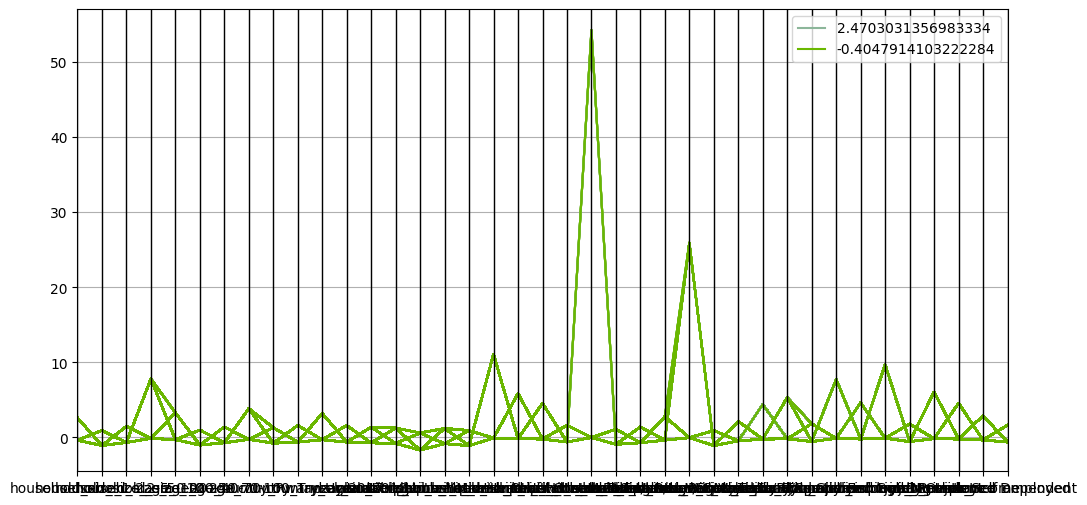

In [54]:
# Select the features you want to visualize
selected_features = ['household_size_1-2', 'household_size_2-5', 'household_size_5-10', 'household_size_10-25', 'age_0-20', 'age_20-40', 'age_40-70', 'age_70-100', 'country_Rwanda', 'country_Tanzania', 'country_Uganda', 'year_2017', 'year_2018', 'location_Urban', 'cellphone_Yes', 'gender_Male', 'relationship_with_head_Head of Household', 'relationship_with_head_Other non-relatives', 'relationship_with_head_Other relative', 'relationship_with_head_Parent', 'relationship_with_head_Spouse', 'marital_status_Dont know', 'marital_status_Married/Living together', 'marital_status_Single/Never Married', 'marital_status_Widowed', 'education_Other/Dont know/RTA', 'education_Primary education', 'education_Secondary education', 'education_Tertiary education', 'education_Vocational/Specialised training', 'job_Farming and Fishing', 'job_Formally employed Government', 'job_Formally employed Private', 'job_Government Dependent', 'job_Informally employed', 'job_No Income', 'job_Other Income', 'job_Remittance Dependent', 'job_Self employed']

# Create a new DataFrame with only the selected features and the target variable
selected_data = df_bined[selected_features + ['bank_account_Yes']]

# Normalize the data (optional, but recommended for parallel coordinates)
normalized_data = (selected_data - selected_data.mean()) / selected_data.std()

# Plot the parallel coordinates
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(normalized_data, 'bank_account_Yes')

# Add legend
plt.legend()

# Display the plot
plt.show()

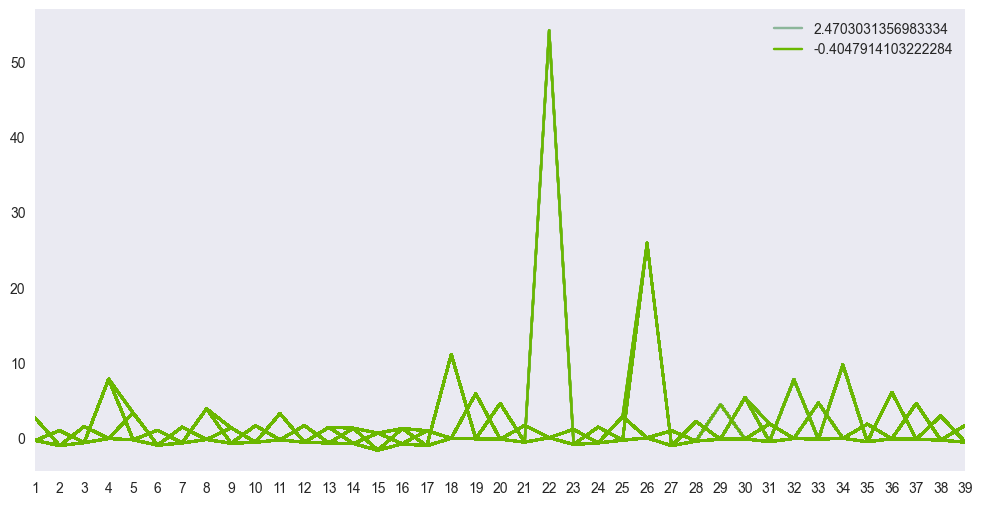

In [60]:
selected_features = selected_features = ['household_size_1-2', 'household_size_2-5', 'household_size_5-10', 'household_size_10-25', 'age_0-20', 'age_20-40', 'age_40-70', 'age_70-100', 'country_Rwanda', 'country_Tanzania', 'country_Uganda', 'year_2017', 'year_2018', 'location_Urban', 'cellphone_Yes', 'gender_Male', 'relationship_with_head_Head of Household', 'relationship_with_head_Other non-relatives', 'relationship_with_head_Other relative', 'relationship_with_head_Parent', 'relationship_with_head_Spouse', 'marital_status_Dont know', 'marital_status_Married/Living together', 'marital_status_Single/Never Married', 'marital_status_Widowed', 'education_Other/Dont know/RTA', 'education_Primary education', 'education_Secondary education', 'education_Tertiary education', 'education_Vocational/Specialised training', 'job_Farming and Fishing', 'job_Formally employed Government', 'job_Formally employed Private', 'job_Government Dependent', 'job_Informally employed', 'job_No Income', 'job_Other Income', 'job_Remittance Dependent', 'job_Self employed']

# Create a new DataFrame with only the selected features and the target variable
selected_data = df_bined[selected_features + ['bank_account_Yes']]

# Normalize the data (optional, but recommended for parallel coordinates)
normalized_data = (selected_data - selected_data.mean()) / selected_data.std()

# Assign numeric labels for the y-axis
labels = range(1, len(selected_features) + 1)

# Plot the parallel coordinates with numeric labels
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(normalized_data, 'bank_account_Yes', axvlines=False)

# Set the labels for the x-axis
plt.xticks(range(len(selected_features)), labels)

# Add legend
plt.legend()

# Display the plot
plt.show()

/var/folders/3m/ptnjs1xn4hjdtk5jszdmj7c00000gn/T/ipykernel_1499/2072760778.py:13: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



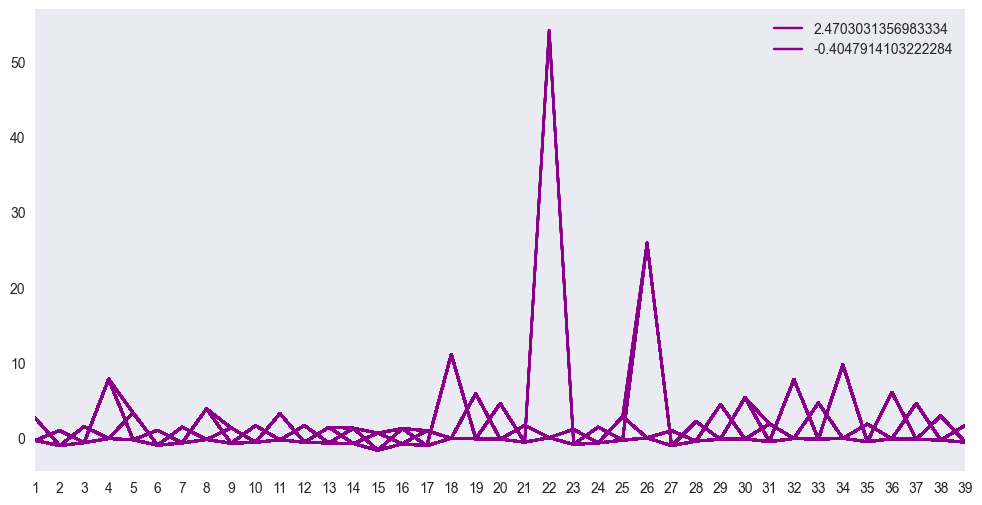

In [61]:
selected_features = selected_features = ['household_size_1-2', 'household_size_2-5', 'household_size_5-10', 'household_size_10-25', 'age_0-20', 'age_20-40', 'age_40-70', 'age_70-100', 'country_Rwanda', 'country_Tanzania', 'country_Uganda', 'year_2017', 'year_2018', 'location_Urban', 'cellphone_Yes', 'gender_Male', 'relationship_with_head_Head of Household', 'relationship_with_head_Other non-relatives', 'relationship_with_head_Other relative', 'relationship_with_head_Parent', 'relationship_with_head_Spouse', 'marital_status_Dont know', 'marital_status_Married/Living together', 'marital_status_Single/Never Married', 'marital_status_Widowed', 'education_Other/Dont know/RTA', 'education_Primary education', 'education_Secondary education', 'education_Tertiary education', 'education_Vocational/Specialised training', 'job_Farming and Fishing', 'job_Formally employed Government', 'job_Formally employed Private', 'job_Government Dependent', 'job_Informally employed', 'job_No Income', 'job_Other Income', 'job_Remittance Dependent', 'job_Self employed']

# Create a new DataFrame with only the selected features and the target variable
selected_data = df_bined[selected_features + ['bank_account_Yes']]

# Normalize the data (optional, but recommended for parallel coordinates)
normalized_data = (selected_data - selected_data.mean()) / selected_data.std()

# Assign numeric labels for the y-axis
labels = range(1, len(selected_features) + 1)

# Plot the parallel coordinates with numeric labels
plt.style.use('seaborn')
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(normalized_data, 'bank_account_Yes', color='darkmagenta' , axvlines=False)

# Set the labels for the x-axis
plt.xticks(range(len(selected_features)), labels)

# Add legend
plt.legend()

# Display the plot
plt.show()